In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import logomaker

# Insert local path to MAVE-NN at beginning of Python's path
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn')

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('sortseq_full-wt')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 10,269
training + validation N: 40,249


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,validation,2,0,0,0,0,0,0,0,0,0,AATTGATGTCCGGTAGCTCACTCATTAGGCAGCCAAGGTTTTAGAC...
1,training,0,0,0,1,0,0,0,0,0,0,AATTCATGTGAGTTATGTCTCTCATTAGGCACCCCAGGCTTGAGAT...
2,training,1,0,0,0,0,0,0,0,0,0,AATTAATGTGAGTTAGCTCACTCATTGGACACCCCAGGCTTTACAC...
3,training,0,1,0,0,0,0,0,0,0,0,ACTTAATAAAAGTCAGCTCACTCATTAATCACCCCACGCTCTACAT...
4,training,0,0,0,0,0,3,0,0,0,0,AATTAATGTGAGTTATCTAACTCATTAGGCACCCCAGGCTTTACAC...
5,training,0,0,0,0,0,0,0,0,1,0,AATTAATGTGAGTTAGCTCACTCATTAGGCCCCCAAGTCTTTACAC...
6,training,0,0,0,0,0,0,0,0,0,2,AATTAGTGTGAGTTGCCTCACACATTAGGCACGCCAGGCTTTACAC...
7,training,0,0,0,0,0,0,0,0,1,0,TATTAATTTGACTTAGCTCACTGATTCGGTACCCTAAGCTTTATAC...
8,training,0,1,0,0,0,0,0,0,0,0,AATTAATGTGAGGTACTTCATTTATGAGGCACCCCAGGCTTTACTC...
9,training,0,1,0,0,0,0,0,0,0,0,AATTAATCTGAGTTATTTTACTCATAAGGCACCCCAGGATTTACAC...


In [3]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=75, Y=10


In [4]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(regression_type='Multi_MPA',
                     L=L,
                     Y=Y,
                     number_latent_nodes=2,
                     alphabet='dna',
                     gpmap_type='additive',
                     mpa_hidden_nodes=100)



In [5]:
# (np.random.rand(1,2,10,100)*np.random.rand(1,2,1,1)).shape

In [6]:
# import tensorflow as tf
# tf.keras.utils.plot_model(model.get_nn(),show_dtype=False,
#     show_layer_names=True,
#      show_shapes=True)

In [7]:
model.get_nn().summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay [(None, 310)]        0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 300)          0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
multi__additive_gp_map_layer (M (None, 2)            602         Sequence_only[0][0]              
__________________________________________________________________________________________________
Labels_input (Lambda)           (None, 10)           0           Sequence_labels_input[0][0]      
______________________________________________________________________________________________

In [8]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True,
               verbose=True)



# Save model
#model.save('sortseq_full-wt_mpa_additive')

N = 40,249 observations set as training data.
Using 24.7% for validation.
Data shuffled.
Time to set data: 0.528 sec.


In [9]:
# Fit model to data
model.fit(learning_rate=.0025,
          epochs=1000,
          batch_size=500,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=False,
          verbose=True)

Epoch 1/1000
61/61 [==============================] - 2s 19ms/step - loss: 1740.8593 - I_var: 0.0287 - val_loss: 1622.1897 - val_I_var: 0.1689
Epoch 2/1000
61/61 [==============================] - 1s 11ms/step - loss: 1537.3758 - I_var: 0.3643 - val_loss: 1456.5001 - val_I_var: 0.4389
Epoch 3/1000
61/61 [==============================] - 1s 13ms/step - loss: 1420.7131 - I_var: 0.4767 - val_loss: 1399.4999 - val_I_var: 0.4996
Epoch 4/1000
61/61 [==============================] - 1s 12ms/step - loss: 1389.8561 - I_var: 0.4875 - val_loss: 1380.3850 - val_I_var: 0.4958
Epoch 5/1000
61/61 [==============================] - 1s 13ms/step - loss: 1366.9978 - I_var: 0.4918 - val_loss: 1372.2655 - val_I_var: 0.4819
Epoch 6/1000
61/61 [==============================] - 1s 12ms/step - loss: 1354.0958 - I_var: 0.4955 - val_loss: 1357.0586 - val_I_var: 0.4924
Epoch 7/1000
61/61 [==============================] - 1s 13ms/step - loss: 1343.5369 - I_var: 0.4967 - val_loss: 1347.6875 - val_I_var: 0.4975

Epoch 58/1000
61/61 [==============================] - 1s 15ms/step - loss: 1236.4962 - I_var: 0.6777 - val_loss: 1263.2300 - val_I_var: 0.6618
Epoch 59/1000
61/61 [==============================] - 1s 13ms/step - loss: 1249.1745 - I_var: 0.6815 - val_loss: 1260.4653 - val_I_var: 0.6677
Epoch 60/1000
61/61 [==============================] - 1s 12ms/step - loss: 1243.3262 - I_var: 0.6808 - val_loss: 1268.0510 - val_I_var: 0.6518
Epoch 61/1000
61/61 [==============================] - 1s 12ms/step - loss: 1237.8245 - I_var: 0.6836 - val_loss: 1261.5854 - val_I_var: 0.6652
Epoch 62/1000
61/61 [==============================] - 1s 14ms/step - loss: 1242.5662 - I_var: 0.6812 - val_loss: 1261.3929 - val_I_var: 0.6657
Epoch 63/1000
61/61 [==============================] - 1s 12ms/step - loss: 1243.8396 - I_var: 0.6833 - val_loss: 1260.5190 - val_I_var: 0.6673
Epoch 64/1000
61/61 [==============================] - 1s 14ms/step - loss: 1244.7971 - I_var: 0.6825 - val_loss: 1261.5182 - val_I_var:

Epoch 115/1000
61/61 [==============================] - 1s 11ms/step - loss: 1241.2224 - I_var: 0.6985 - val_loss: 1252.9094 - val_I_var: 0.6841
Epoch 116/1000
61/61 [==============================] - 1s 13ms/step - loss: 1232.2631 - I_var: 0.7013 - val_loss: 1253.2070 - val_I_var: 0.6837
Epoch 117/1000
61/61 [==============================] - 1s 15ms/step - loss: 1238.4117 - I_var: 0.6980 - val_loss: 1257.0786 - val_I_var: 0.6754
Epoch 118/1000
61/61 [==============================] - 1s 14ms/step - loss: 1240.3939 - I_var: 0.6996 - val_loss: 1253.8737 - val_I_var: 0.6824
Epoch 119/1000
61/61 [==============================] - 1s 14ms/step - loss: 1237.4270 - I_var: 0.6974 - val_loss: 1257.0140 - val_I_var: 0.6755
Training time: 110.1 seconds


In [10]:
# Load model
#model = mavenn.load('sortseq_full-wt_mpa_additive')

On test data:


Text(0.5, 1.0, 'training hisotry')

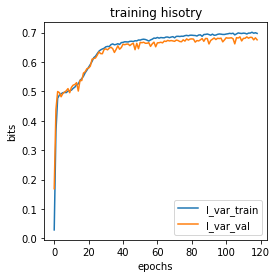

In [11]:
# Show training history
print('On test data:')
x_test = test_df['x'].values
y_test = test_df[y_cols].values

# # Compute likelihood information
# I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
# print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
# I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
# print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
#ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
#ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

In [12]:
val_I_var_hist[len(val_I_var_hist)-1]

0.6754621267318726

In [13]:
theta = model.get_nn().layers[2].get_weights()[1].copy()

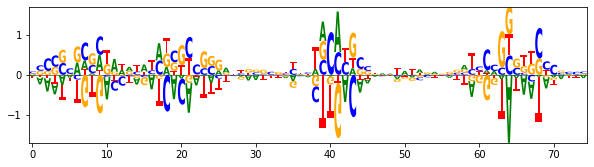

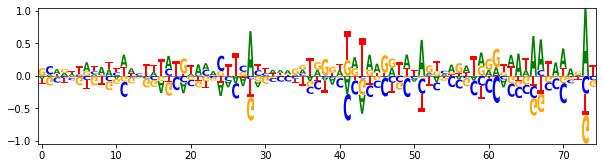

In [15]:
theta_0 = pd.DataFrame(theta[0][0],columns=['A','C','G','T'])
theta_1 = pd.DataFrame(theta[0][1],columns=['A','C','G','T'])

logomaker.Logo(theta_0,center_values=True)
logomaker.Logo(theta_1,center_values=True)

In [16]:
import tensorflow as tf
import tensorflow.keras.backend as K

#mpa_function = K.function([self.model.model.layers[1].input],
#                            [self.model.model.layers[2].output])
#model.get_nn().layers[2].input
phi_lim = [-6, 6]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

In [17]:
# phi_2 = np.array([[1.9,2.1], [2.3,1.2],[1.2,0.0]])
# model.layer_measurement_process.p_of_all_y_given_phi(phi_2.tolist())
phis_list_1 = []
phis_list_2 = []
phi_1 = -1.0
phi_2 = 0.25

for _ in range(len(phi_grid)):
    temp_list_1 = [float(phi_grid[_]),phi_2]
    temp_list_2 = [phi_1, -float(phi_grid[_])]
    phis_list_1.append(temp_list_1)
    phis_list_2.append(temp_list_2)
    
measurement_process_phi_2_constant = np.transpose(model.layer_measurement_process.p_of_all_y_given_phi(phis_list_1))
measurement_process_phi_1_constant = np.transpose(model.layer_measurement_process.p_of_all_y_given_phi(phis_list_2))

Text(0.5, 1.05, 'Multi-latent MPA regression')

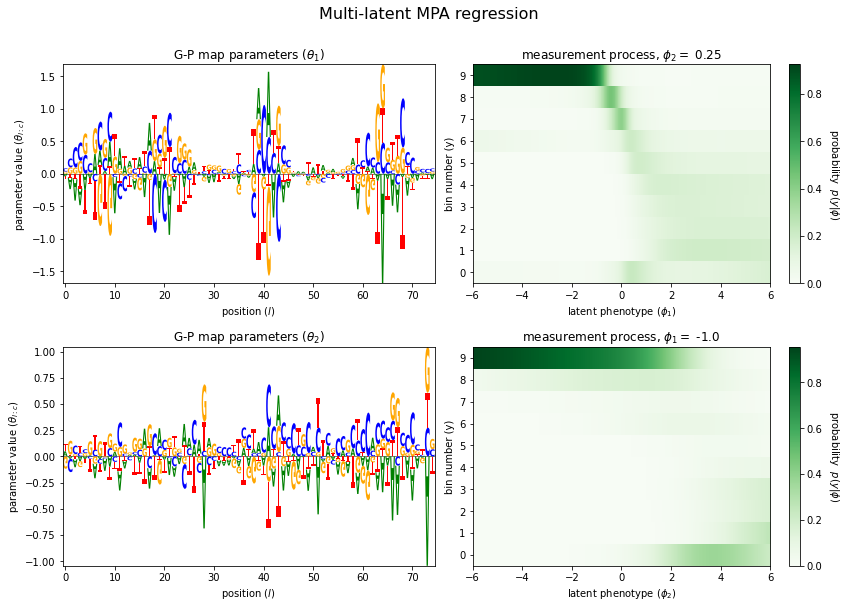

In [18]:
# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Create figure with two panels
fig, axs = plt.subplots(2,2,figsize=[12,8])

# Left panel: draw logo using logomaker
ax = axs[0,0]
logo = logomaker.Logo(theta_0, ax=ax, center_values=True)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters $(\\theta_1)$')

# Right panel: draw measurement process as heatmap
ax = axs[0,1]
im = ax.imshow(measurement_process_phi_2_constant,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi_1$)')
ax.set_title(f'measurement process, $\phi_2 = $ {phi_2}')
cb = plt.colorbar(im,ax=ax)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")


# Left panel: draw logo using logomaker
ax = axs[1,0]
logo = logomaker.Logo(-theta_1, ax=ax, center_values=True)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters ($\\theta_2$)')

# Right panel: draw measurement process as heatmap
ax = axs[1,1]
im = ax.imshow(measurement_process_phi_1_constant,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi_2$)')
ax.set_title(f'measurement process, $\phi_1 = $ {phi_1}')
cb = plt.colorbar(im,ax=ax)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

fig.tight_layout()
fig.suptitle('Multi-latent MPA regression',y=1.05,fontsize=16)
#fig.savefig('multi_latent_mpa.png',dpi=300,bbox_inches='tight')

In [19]:
model.I_predictive(x=x_test, y=y_test)

Predictive information not implemented multi latent MPA regression.
